# Fraunhofer diffraction at one or more slits.

In [57]:
from IPython.display import HTML
HTML('''
        <style>
                .prompt{display: None;}
                
                .output_wrapper button.btn.btn-default,
                .output_wrapper .ui-dialog-titlebar {display: none;} <!-- hide toolbars and buttons of the plot -->
                
        </style>
        <script>
                code_show=true; 
                function code_toggle() 
                {
                     if (code_show)
                     {
                         $('div.input').hide();
                     } else
                     {
                         $('div.input').show();
                     }
                     code_show = !code_show
                } 
                $( document ).ready(code_toggle);
        </script>
        The raw code for this IPython notebook is by default hidden for easier reading.
        To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
        ''')



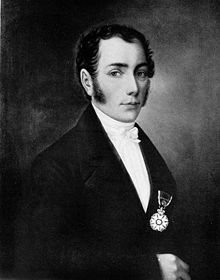
> *Joseph von Fraunhofer, (Wikipedia)*

Suppose that a monochromatic beam of light falls on a screen with one or more slits
in it. If we place a lens behind this screen, then we can observe the Fraunhofer (or far field) diffraction pattern at the focal plane of the lens. The structure of the pattern depends on the wavelength, $λ$, the number $N$ of slits, the width $b$ of the slits, and the distance $a$ between the slits.

Interference/diffraction maxima occur at positions where the waves from the different slits (partially) constructively interfere, whereas minima occur when all waves destructively interfere (they all add up to zero amplitude!). For two or more slits the resulting diffraction pattern is a combination of an interference pattern (due to interference between slits) and a diffraction pattern (due to the finite width of the slits).
  
<br>  

<div>
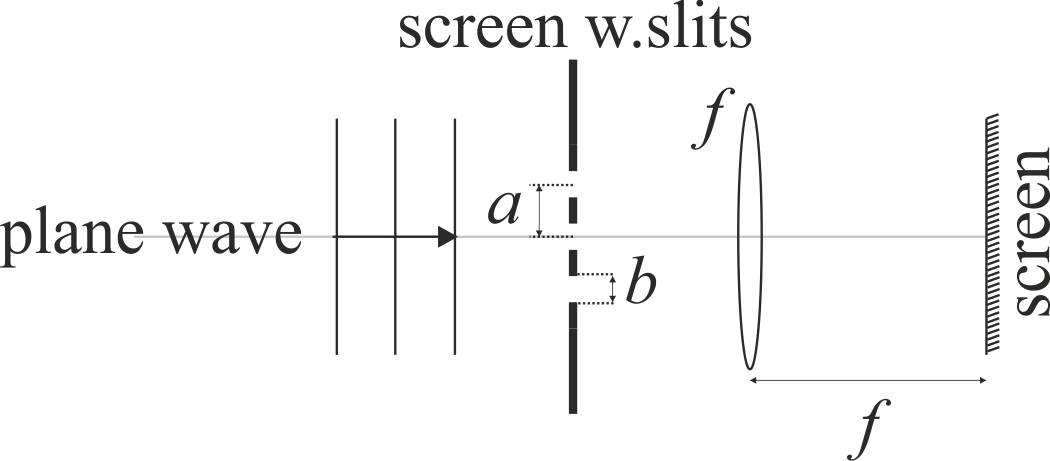
</div>

> *Setup of the Fraunhofer diffraction experiment. A plane wave enters a screen with slits. The Far field diffraction pattern is observed at the focal plane of lens f*
  
  

### Determine the slit dimensions

Here we consider the setup as show in the figure above.

1. Derive an equation that expresses the position $x_m$ of the interference maxima on the screen as measured relative to the optical axis.
2. As in (1) but now for the position $x_m$ of the diffraction minima.
3. Set the number of slits to $N=2$ and set a slit distance $a$ at 4 times the slit width $b$ (take the width at least 50 $\mu$m).
4. Find from the displayed interference/diffraction pattern the slit width and slit distance and compare with expectations.


Literature: Hecht, 5th ed., chapter 10.


<IPython.core.display.Javascript object>


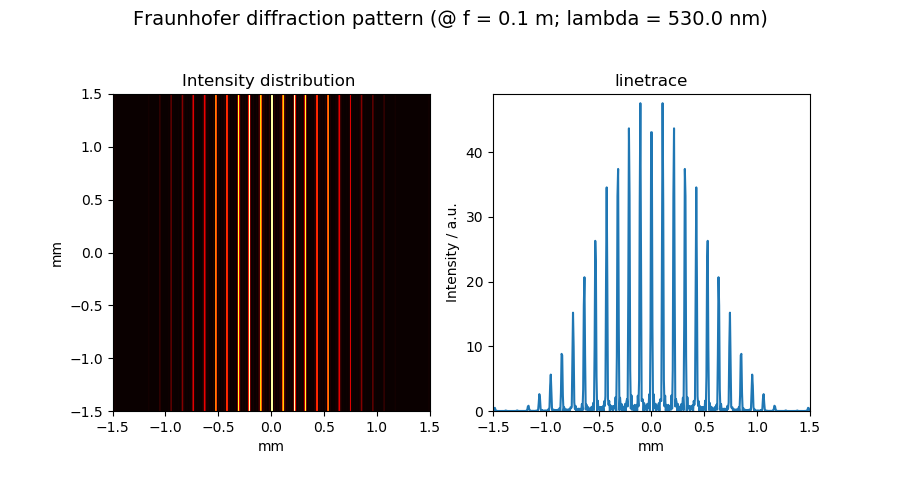

interactive(children=(FloatSlider(value=300.0, continuous_update=False, description='slit distance $a$ [$\\mu$…

In [5]:
%matplotlib notebook
#!/usr/bin/env python
"""
    Computer practical 6.1. Fresnel diffraction, plane wavefront.
    =============================================================

    This is part of the 'computer practical' set of assignments.
    Demonstrates Fresnel diffraction when a plane wavefront enters 
    a round hole.
    Measure the values of z and d for which minima and/or maxima on-axis occur
    and apply the Fresnel-zone theory to find the wavelength of the light.
"""
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

# define constants
wavelength = 530e-9  # wavelength [m]
k = 2*np.pi/wavelength  # wavenumber [m]
size = 3e-3  # size of the grid [m]
N = 500  # defines grid points (NxN)
f = 0.1  # focal distance of lens [m]
x = np.linspace(-size/2, size/2, N, endpoint=True)

# initialize plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,5))
fig.suptitle(f'Fraunhofer diffraction pattern (@ f = {f} m; lambda = {wavelength*1e9} nm)', fontsize=14)
ax1.set_title('Intensity distribution ')
ax1.set_aspect('equal', 'box')
ax1.set_xlabel('mm')
ax1.set_ylabel('mm')
ext = size*1e3/2
img = ax1.imshow([[]], cmap='hot', extent=[-ext, ext, -ext, ext])

ax2.set_aspect(2*ext/4)
ax2.set_xlim(-ext, ext)
ax2.set_ylim(0, 4)
ax2.set_xlabel('mm')
ax2.set_ylabel('Intensity / a.u.')
ax2.set_title('linetrace')
line, = ax2.plot([],[])
plt.show()


def FraunhoferSim(a,b,n_slits):
    """
    Calculates the Fraunhofer diffraction pattern for a screen with slits
    and updates the plot
    a : slit distance in micrometer
    b : slit width in micrometer
    n_slits : number of slits (string)
    """
    
    # calculate diffraction pattern
    n_slits = int(n_slits)
    a = a*1e-6
    b = b*1e-6
    alfa = k*a/2*x/f
    beta = k*b/2*x/f
    I = np.sinc(beta/np.pi)**2 * (np.sin(n_slits*alfa)/np.sin(alfa))**2
    
    # update plots
    img.set_data(np.tile(I,(N, 1)))
    img.autoscale()
    line.set_data(x*1e3, I)
    
    # rescale linetrace plot to maintain square plot with maximum range
    ax2.set_aspect(2*ext/n_slits**2)
    ax2.set_ylim(0, n_slits**2)
    
    ax1.format_coord = lambda x, y: f'x = {x:2.2f} mm, Intensity = '

w=interact(FraunhoferSim,
           n_slits = widgets.Dropdown(style={'description_width':'initial'}, description='number of slits $N$', 
                                      options=['1','2','3','4','5','6','7','8','9','10'],value='2', continuous_update=False),
           a=widgets.FloatSlider(layout={'width':'initial'}, style={'description_width':'initial'}, 
                                 description='slit distance $a$ [$\mu$m]',min=100,max=500.0,step=10,value=300,
                                 continuous_update=False,readout_format='.1f'),
           b=widgets.FloatSlider(layout={'width':'initial'}, style={'description_width':'initial'}, 
                                 description='slit width $b$ [$\mu$m]',min=10,max=100,step=10,value=50,
                                 continuous_update=False,readout_format='.3f'),
          );